[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/data_patch_sequential.ipynb)

# Patch Sequential

In this tutorial we will show how we can quickly perform **patch processing** using the features provided by the `kornia.augmentation.PatchSequential` API.

## Install and get data

We install Kornia and some dependencies, and download a simple data sample

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://raw.githubusercontent.com/kornia/data/main/panda.jpg"
download_image(url)

'panda.jpg'

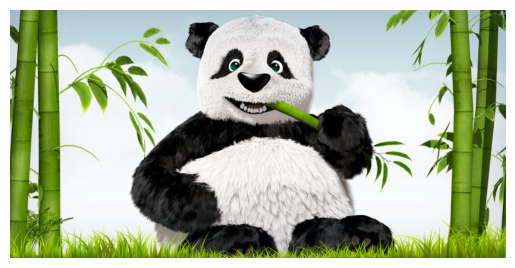

In [ ]:
import cv2
import numpy as np
import torch
from kornia import augmentation as K
from kornia.augmentation import ImageSequential, PatchSequential
from kornia.geometry import bbox_to_mask
from kornia.utils import image_to_tensor, tensor_to_image
from matplotlib import pyplot as plt
from torchvision.transforms import transforms

to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

img = cv2.imread("panda.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

img_tensor = image_to_tensor(img).float() / 255.0
plt.imshow(img)
plt.axis("off");

## Patch Augmentation Sequential with patchwise_apply=True

``patchwise_apply`` is a feature that used to define unique processing pipeline for each patch location. If ``patchwise_apply=True``, the number of pipelines defined must be as same as the number of patches in an image.

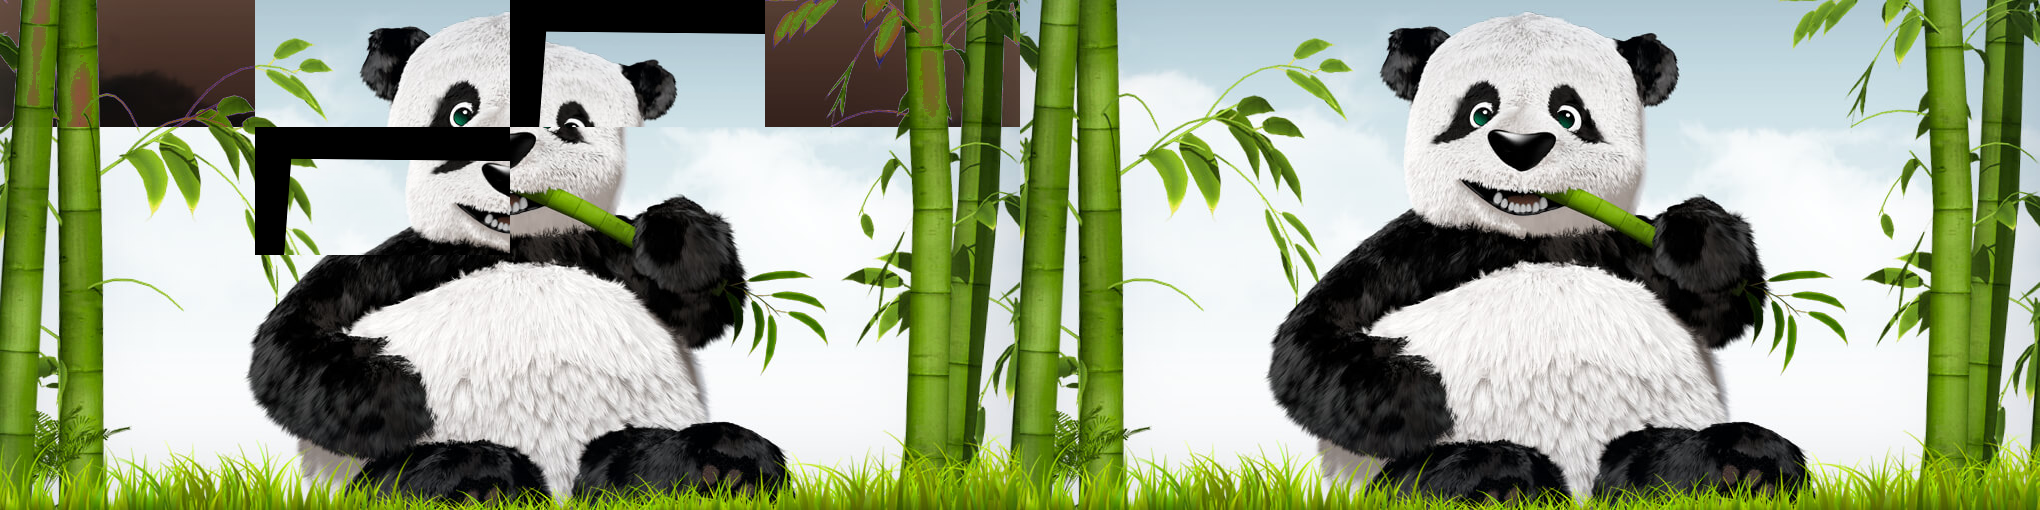

In [ ]:
pseq = PatchSequential(
    ImageSequential(
        K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
        K.RandomPerspective(0.2, p=0.5),
        K.RandomSolarize(0.1, 0.1, p=0.5),
    ),
    K.RandomAffine(15, [0.1, 0.1], [0.7, 1.2], [0.0, 20.0], p=0.5),
    K.RandomPerspective(0.2, p=0.5),
    ImageSequential(
        K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
        K.RandomPerspective(0.2, p=0.5),
        K.RandomSolarize(0.1, 0.1, p=0.5),
    ),
    K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
    K.RandomAffine(15, [0.1, 0.1], [0.7, 1.2], [0.0, 20.0], p=0.5),
    K.RandomPerspective(0.2, p=0.5),
    K.RandomSolarize(0.1, 0.1, p=0.5),
    K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
    K.RandomAffine(15, [0.1, 0.1], [0.7, 1.2], [0.0, 20.0], p=0.5),
    ImageSequential(
        K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
        K.RandomPerspective(0.2, p=0.5),
        K.RandomSolarize(0.1, 0.1, p=0.5),
    ),
    K.RandomSolarize(0.1, 0.1, p=0.5),
    K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
    K.RandomAffine(15, [0.1, 0.1], [0.7, 1.2], [0.0, 20.0], p=0.5),
    K.RandomPerspective(0.2, p=0.5),
    K.RandomSolarize(0.1, 0.1, p=0.5),
    patchwise_apply=True,
    same_on_batch=True,
)
out_tensor = pseq(img_tensor[None].repeat(2, 1, 1, 1))
to_pil(torch.cat([out_tensor[0], out_tensor[1]], dim=2))

## Patch Augmentation Sequential with patchwise_apply=False

If ``patchwise_apply=False``, all the args will be combined and applied as one pipeline for each patch.

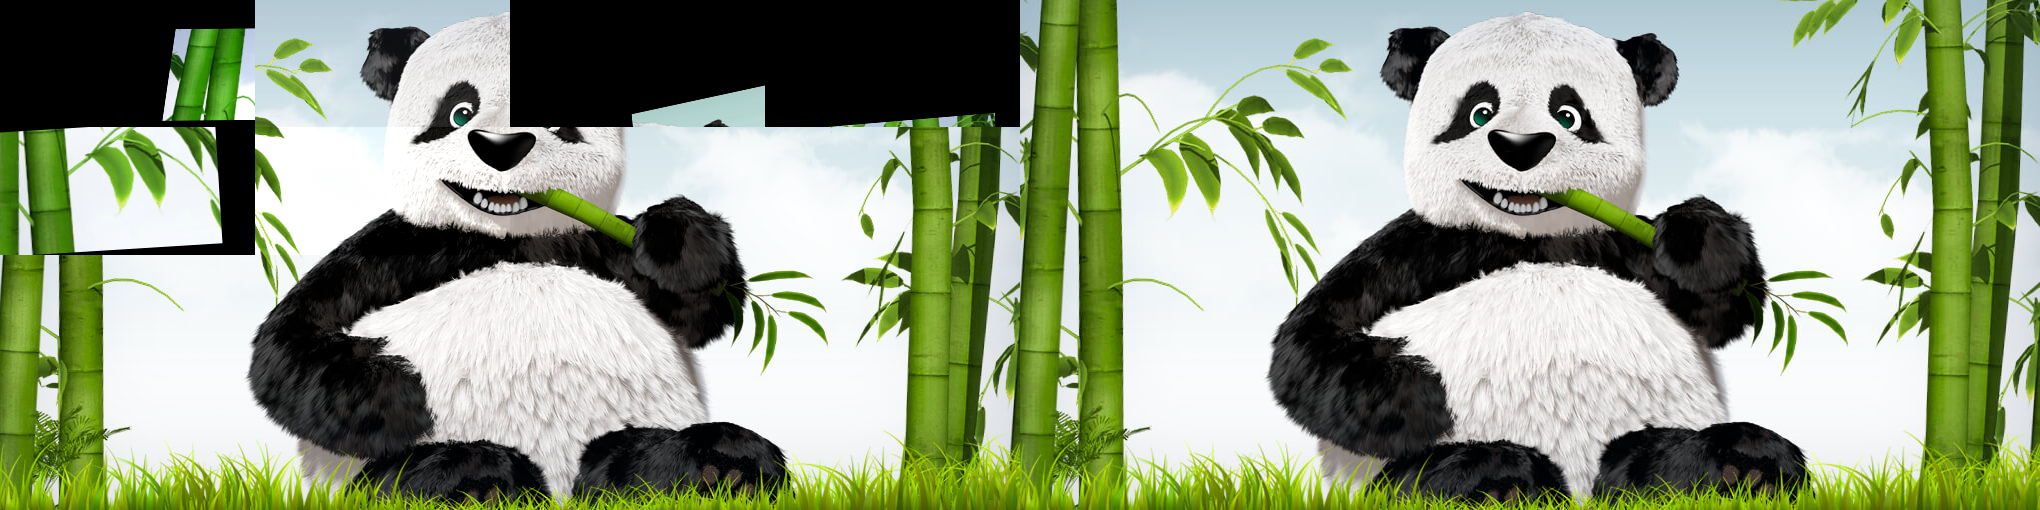

In [ ]:
pseq = PatchSequential(
    K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.75),
    K.RandomAffine(15, [0.1, 0.1], [0.7, 1.2], [0.0, 20.0], p=0.5),
    patchwise_apply=False,
    same_on_batch=False,
)
out_tensor = pseq(img_tensor[None].repeat(2, 1, 1, 1))
to_pil(torch.cat([out_tensor[0], out_tensor[1]], dim=2))